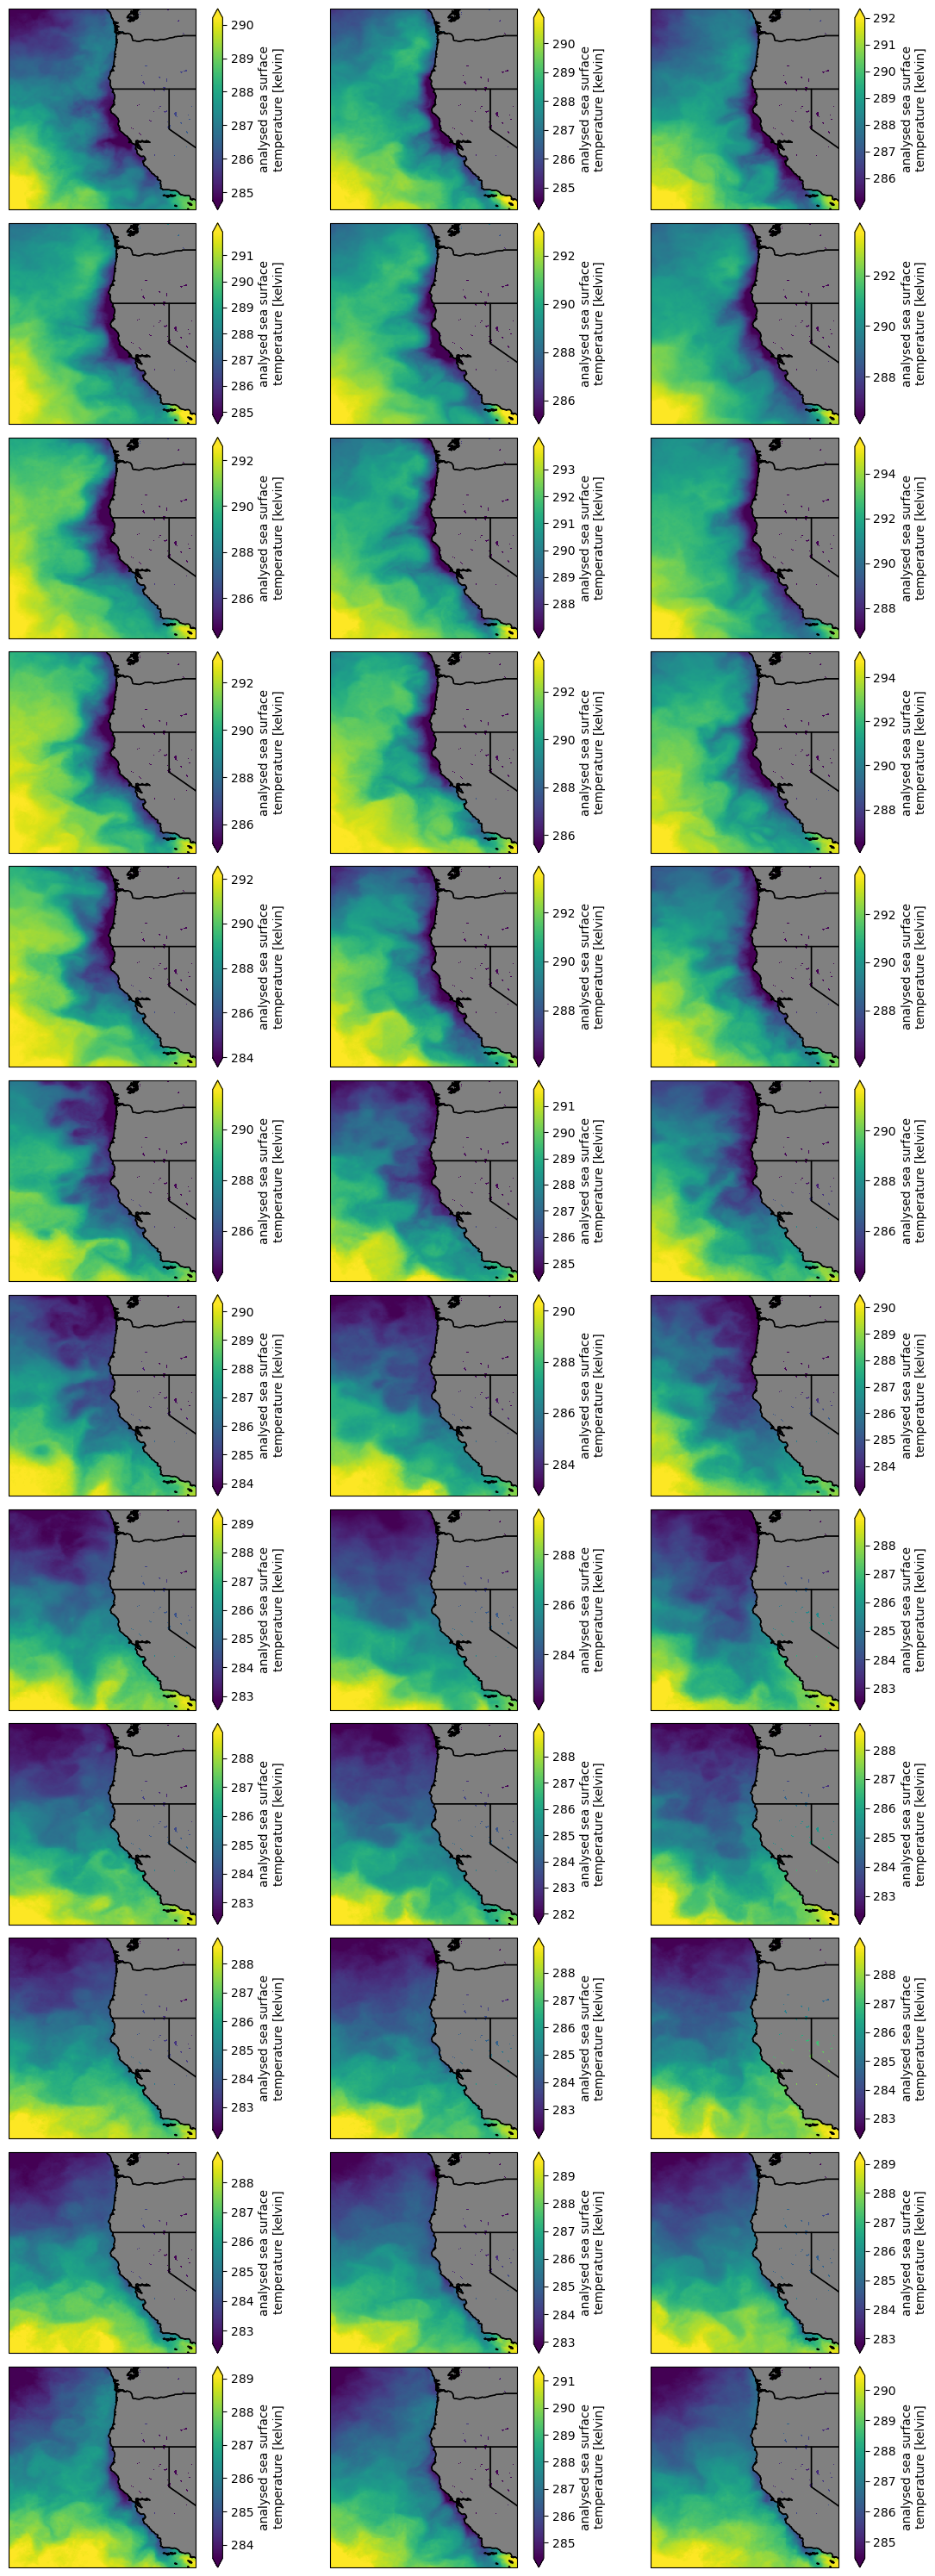

In [1]:
#Question 4
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec
import matplotlib.pyplot as plt
import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

# creating the monthly averages 
monthly_avg = ds.resample(time="1MS").mean()
monthly_data = monthly_avg.isel(time=(monthly_avg['time.year'] > 2013) & (monthly_avg['time.year'] < 2017))

# create the plot with coastlines
fig, axes = plt.subplots(nrows=12, ncols=3, figsize=(12, 30), subplot_kw={'projection': crs})
axes = axes.T.flatten()

for i, ax in enumerate(axes):
    monthly_avg.isel(time=i).analysed_sst.plot.imshow(ax=ax, x="lon", y="lat", robust=True)
    ax.set_title("")
    ax.coastlines("10m", color="k")
    ax.add_feature(cfeature.LAND, color="grey")
    ax.add_feature(cfeature.STATES.with_scale("10m"))

plt.tight_layout()
plt.show()


##TO-DO: 
 #standardize sst range for all subplots
 #remove individual color bar and put horizontal colorbar for all 
 #put longitude and latitude
 #put year titles
 #replace anomilies in the data with 0's

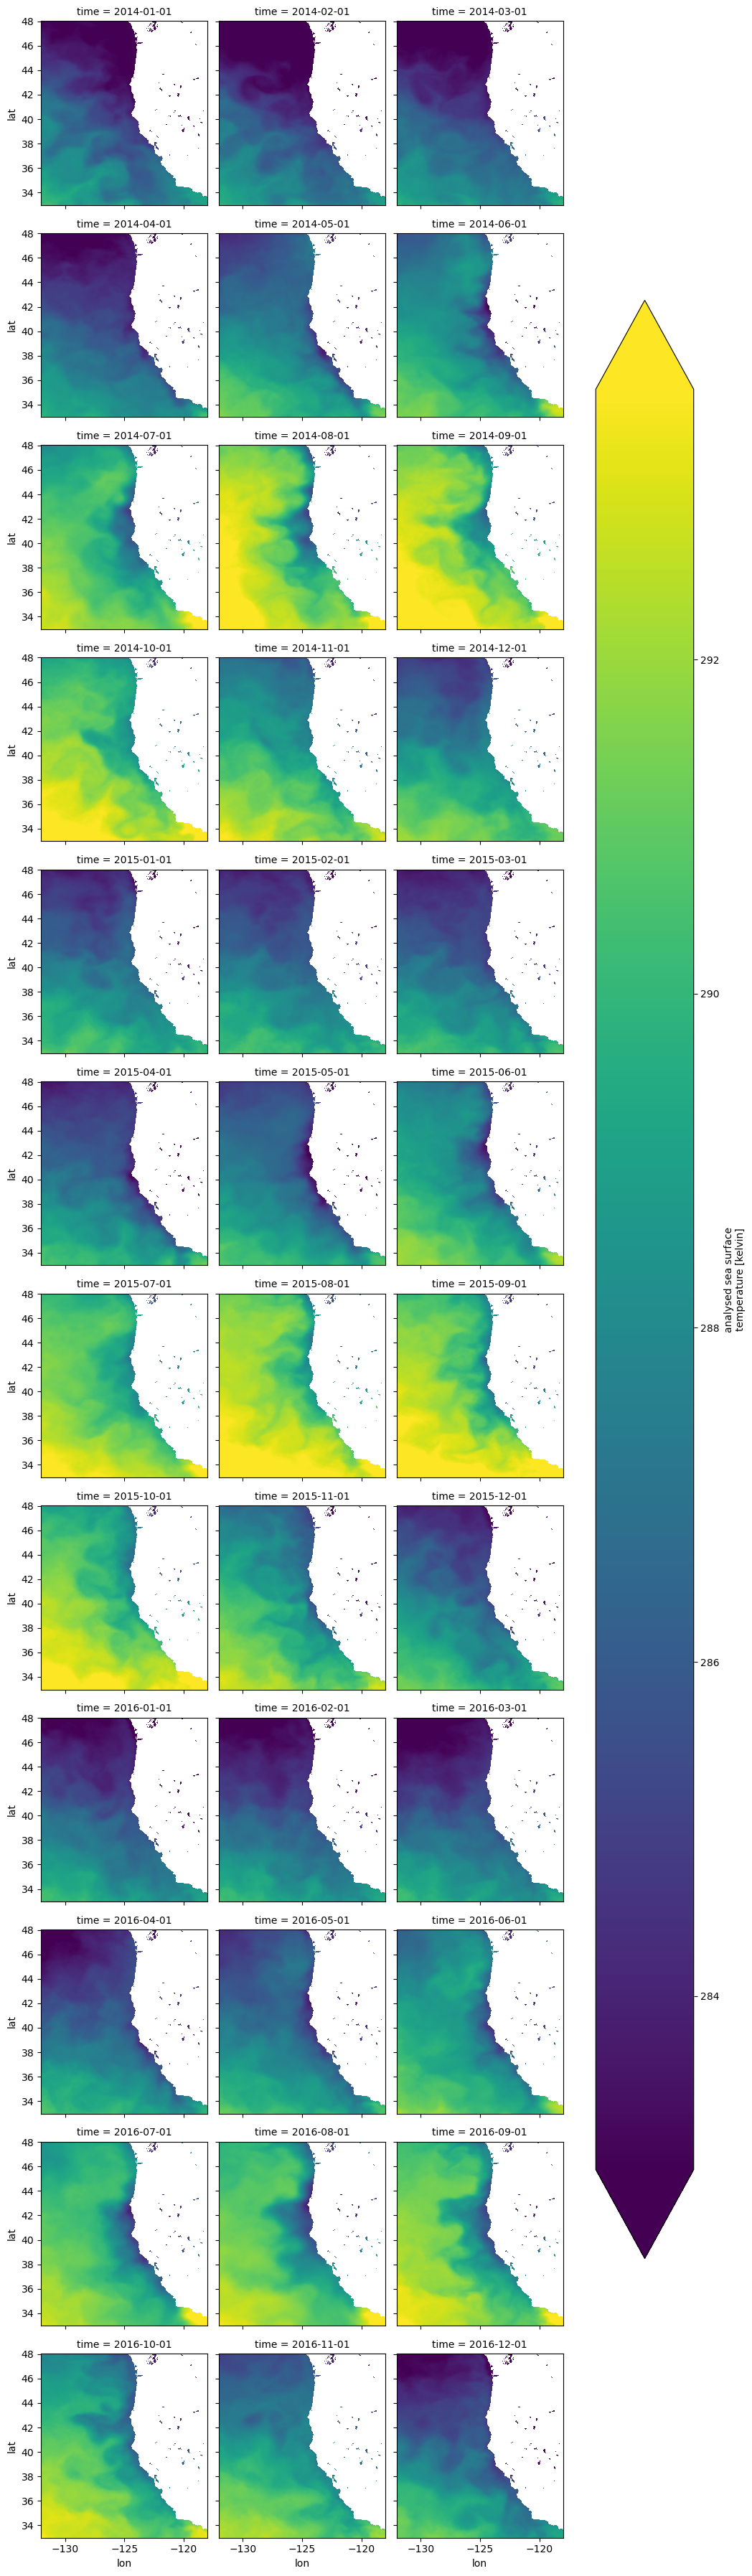

In [7]:
## the original take on 4

g = monthly_data.analysed_sst.plot.imshow(x="lon", y="lat", col="time", col_wrap=3, robust=True)

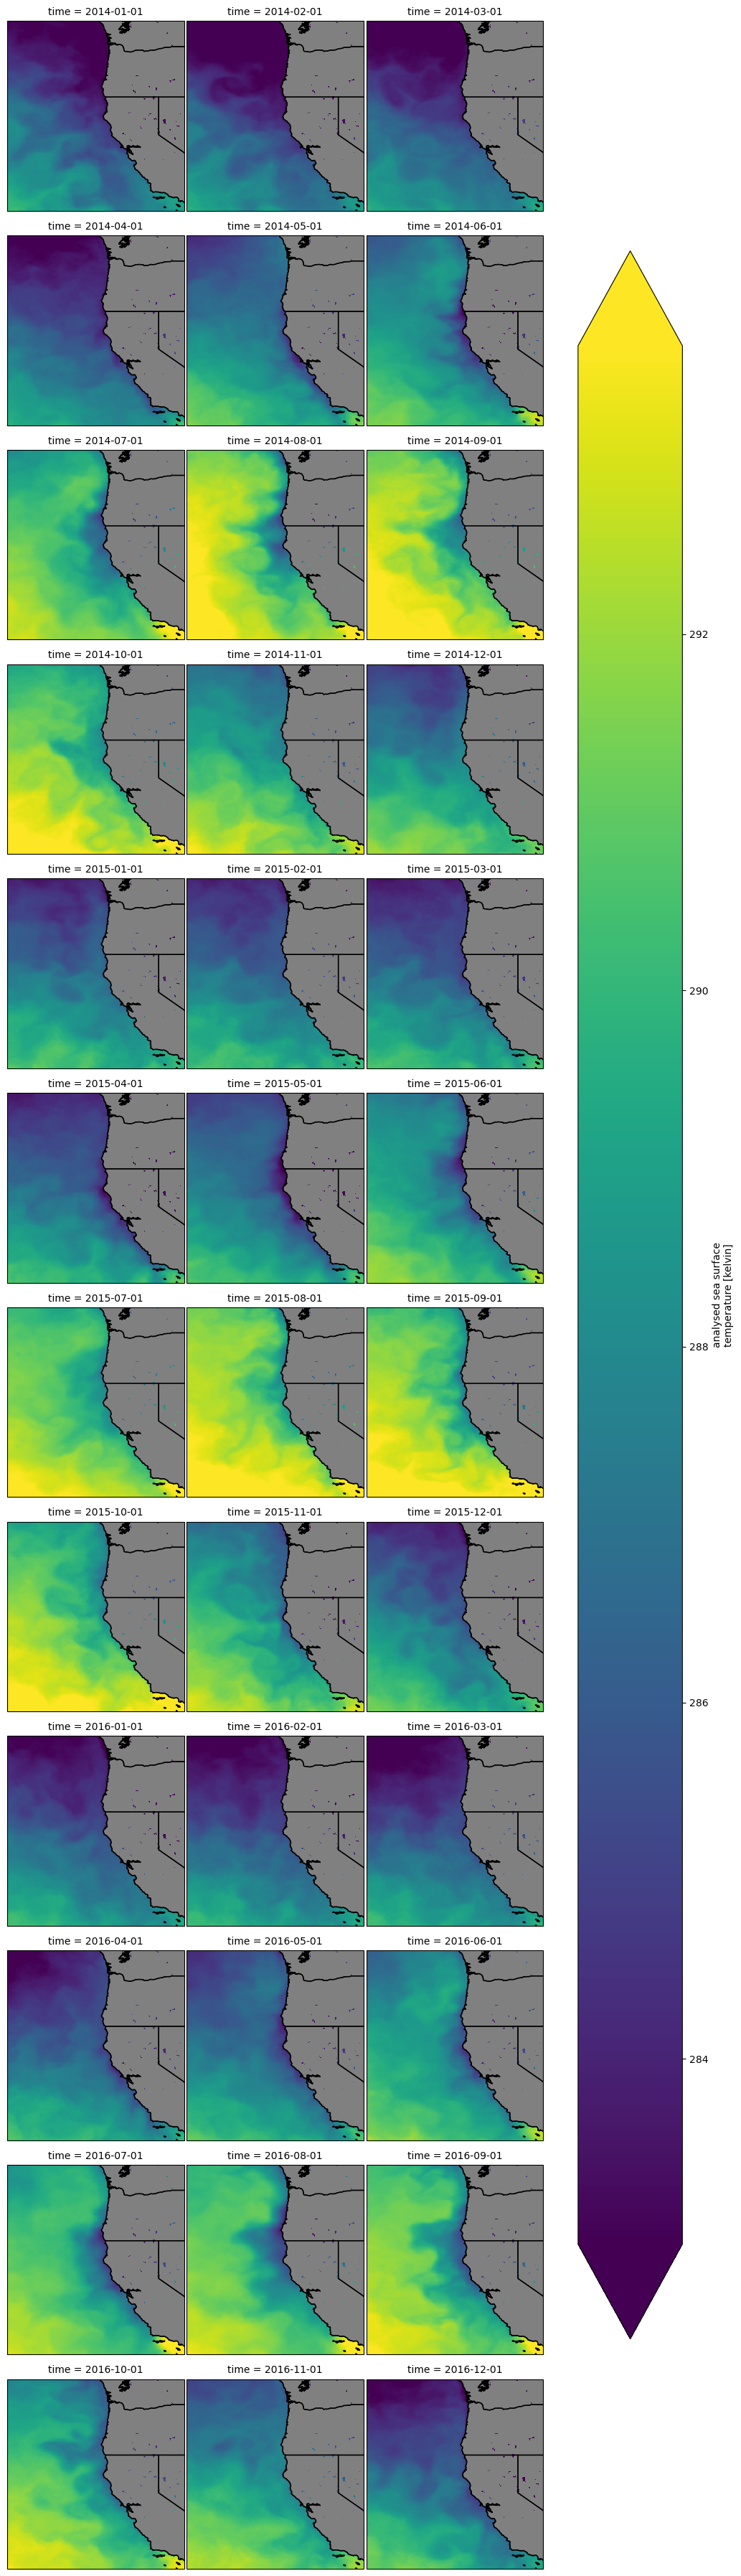

In [23]:
#monthly_data.analysed_sst.plot.imshow(x="lon", y="lat", col="time", col_wrap=3, robust=True)
p = monthly_data.analysed_sst.plot.imshow(
    x="lon", y="lat",
    transform=ccrs.PlateCarree(),
    col="time",
    col_wrap=3,
    subplot_kws={'projection': ccrs.PlateCarree()},
    robust = True
)

for ax in p.axs.flat:
    ax.coastlines("10m", color="k")
    ax.add_feature(cfeature.LAND, color="grey")
    ax.add_feature(cfeature.STATES.with_scale("10m"))
    
plt.draw()

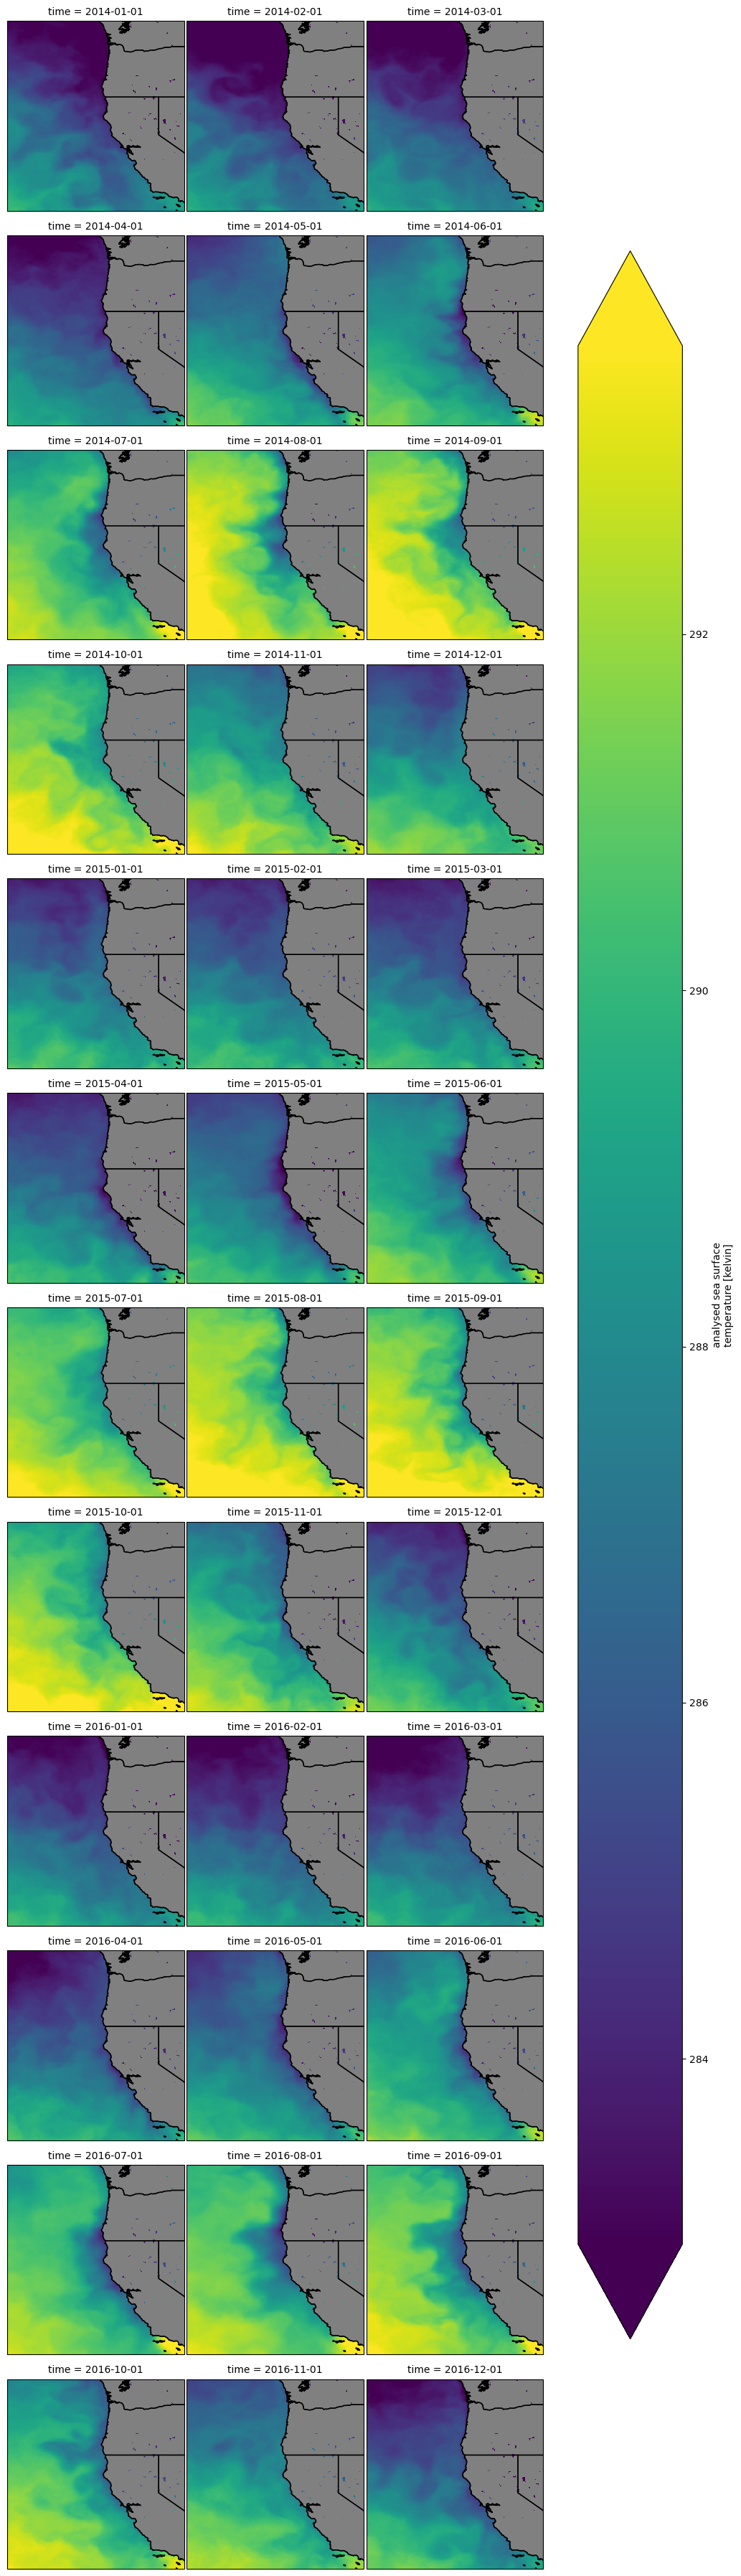

In [11]:
g = monthly_data.analysed_sst.plot.imshow(x="lon", y="lat", transform=ccrs.PlateCarree(),
    col="time",
    col_wrap=3,
    subplot_kws={'projection': ccrs.PlateCarree()},
    robust = True)

for ax in g.axs.flat:
    ax.coastlines("10m", color="k")
    ax.add_feature(cfeature.LAND, color="grey")
    ax.add_feature(cfeature.STATES.with_scale("10m"))




In [3]:
#tackling the data issue: creating the anomalies 
monthly_avg = ds.resample(time="1MS").mean()
climatology_avg = ds.isel(time=(ds['time.year'] > 2001) & (ds['time.year'] < 2013)).groupby('time.month').mean()[['analysed_sst']]
monthly_data = monthly_avg.isel(time=(monthly_avg['time.year'] > 2013) & (monthly_avg['time.year'] < 2017))
monthly_data

<xarray.Dataset>
Dimensions:           (time: 36, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2014-01-01 2014-02-01 ... 2016-12-01
Data variables:
    analysed_sst      (time, lat, lon) float32 290.2 290.2 290.2 ... nan nan nan
    analysis_error    (time, lat, lon) float32 0.3774 0.3768 0.3768 ... nan nan
    mask              (time, lat, lon) float32 1.0 1.0 1.0 1.0 ... 2.0 2.0 2.0
    sea_ice_fraction  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

In [5]:
#calculating the anomalies 
monthly_data["anomalies"] = monthly_data["analysed_sst"] - climatology_avg["analysed_sst"]
monthly_data


<xarray.Dataset>
Dimensions:           (time: 36, lat: 251, lon: 234, month: 12)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2014-01-01 2014-02-01 ... 2016-12-01
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    analysed_sst      (time, lat, lon) float32 290.2 290.2 290.2 ... nan nan nan
    analysis_error    (time, lat, lon) float32 0.3774 0.3768 0.3768 ... nan nan
    mask              (time, lat, lon) float32 1.0 1.0 1.0 1.0 ... 2.0 2.0 2.0
    sea_ice_fraction  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    anomalies         (time, lat, lon, month) float32 0.5689 1.113 ... nan nan
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

ValueError: A 3-dimensional array was passed to imshow(), but there is no dimension that could be color.  At least one dimension must be of size 3 (RGB) or 4 (RGBA), and not given as x or y.

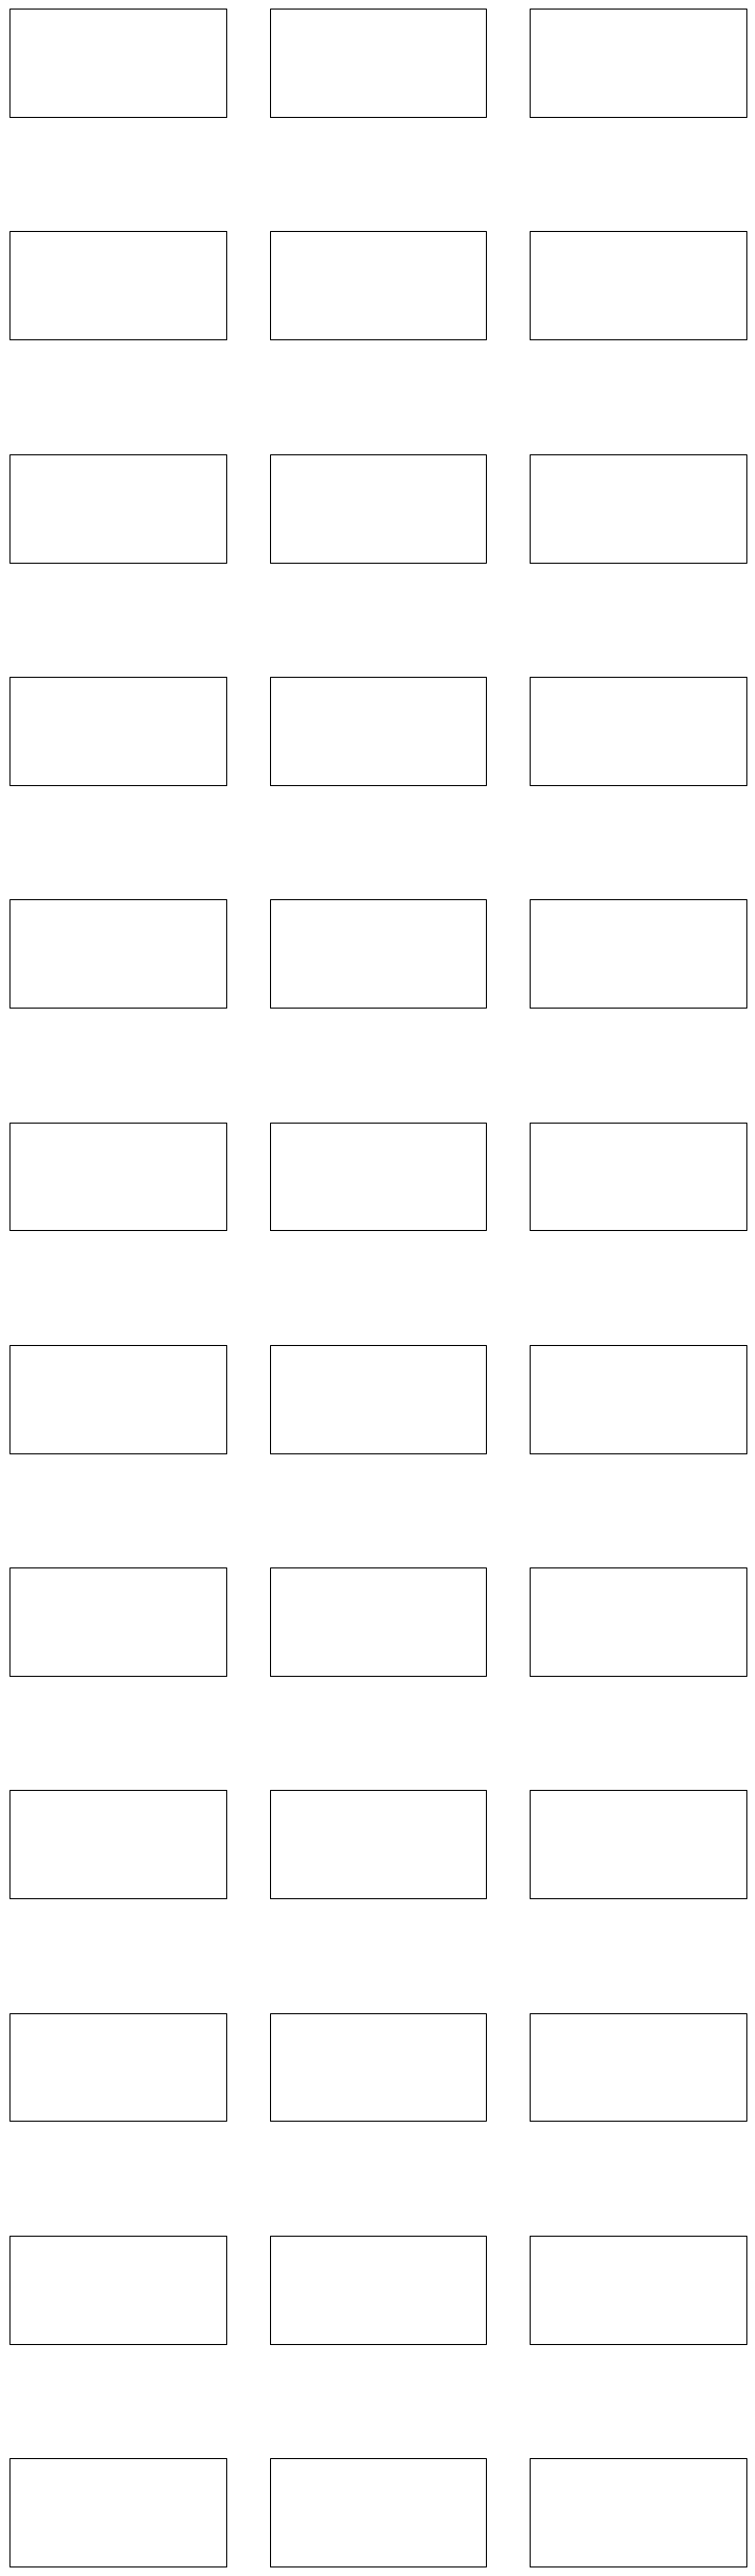

In [12]:
#plotting the anomalies using prior methods
g = monthly_data.anomalies.plot.imshow(x="lon", y="lat", transform=ccrs.PlateCarree(),
    col="time",
    col_wrap=3,
    subplot_kws={'projection': ccrs.PlateCarree()},
    robust = True)

for ax in g.axs.flat:
    ax.coastlines("10m", color="k")
    ax.add_feature(cfeature.LAND, color="grey")
    ax.add_feature(cfeature.STATES.with_scale("10m"))
